# Guía 2 - Análisis en el dominio de la frecuencia

Comenzamos proponiendo una señal armónica (coseno)

$$x(t) = A \cos ( \omega t + \phi) = A \cos(\phi) \cos(\omega t) - A \sin(\phi) \sin(\omega t) = a \cos(\omega t) + b \sin(\omega t)$$

con 

$$ \omega = 2 \pi f, \,\,\,\,\,\,\,\,   f = \frac{1}{T}$$

donde $f$ es la frecuencia, $T$ el período y $\phi$ una fase inicial. La identidad trigonométrica nos muestra que la combinación lineal de senos y cosenos equivale a un coseno (o seno) con una fase inicial.

Ciertamente, podemos recuperar un conjunto discreto de valores para $t : \{0,1, \cdots, N-1\}$, con $T=N$ y obtener la serie $x_t$. Esto se conoce como muestreo (sampling) o conversión analógica-digital. La frecuencia de muestreo fija el intervalo entre las obervaciones. La separación constante en el tiempo facilita el análisis y modelado, y la serie debería adaptarse si es el caso de intervalos variables. La señal muestreada suele ser el promedio de sus valores durante el intervalo y su amplitud se codifica como un número binario. Por ejemplo, un codificador de 16 bits discretizará el rango en 65536 valores. Así, el proceso de digitalización altera la señal pero las diferencias pueden ser reducidas con una mayor frecuencia de muestreo y una codificación con mayor número de bits.   

__Muestreo__

<img src="Figs/sampling.png" alt="Sampling" width="600"/>

__Cuantificación__

<img src="Figs/quantization.png" alt="Quantization" width="600"/>

## Transformada discreta de Fourier (DFT) y rápida (FFT)

En general, una serie $x_t$ de longitud $N$ (asumimos N impar) se puede ajustar por

$$x_t = a_0 + \sum_{k=1}^{N/2} a_k \cos \left( \frac{2 \pi k t}{N} \right) + b_k \sin \left( \frac{2 \pi k t}{N} \right)$$

ya que cada componente es independiente. Los vectores $\{1, \cos(2 \pi k t /N), \sin(2 \pi k t /N)\}$ con $k=1, \cdots, N/2$ forman una base ortogonal. De esta manera, el armónico $k$ traza $k$ ciclos dentro del período $N$ y se cumple que $-0.5 \leq k/N \leq 0.5$. (Más adelante abordamos las frecuencias negativas). La *potencia* del ármónico $k$ es

$$A_k^2 = a_k^2 + b_k^2$$

El *Teorema de Parseval* iguala la varianza en el tiempo de una serie con la suma de las ${N/2}$ componentes de frecuencias enteras 

$$\frac{1}{N} \sum_{t=1}^N x_t^2 = A_0^2 + \frac{1}{2}\sum_{k=1}^{N/2} A_k^2$$ 

$$\mathrm{Var}(x) = \frac{1}{2}\sum_{k=1}^{N/2} A_k^2$$ 

Además, a través de la *fórmula de Euler* 

$$e^{i\theta} = \cos(\theta) + i \sin(\theta)$$

se muestra la equivalencia con la representación 

$$x_t = \frac{1}{N} \sum_{k=0}^{N-1} X_k e^{2 \pi i k t / N}\,\,\,\,\,\,\,\, t=0,\cdots,N-1$$

$$X_k = \sum_{t=0}^{N-1} x_t e^{-2 \pi i k t / N}\,\,\,\,\,\,\,\, k=0,\cdots,N-1$$

Los vectores $u_k = \left[ \left. e^{2 \pi i k t / N} \right| t = 0, 1, \cdots , N − 1 \right]^\mathrm{T}$, para $k=0,1,\ldots ,N-1$, también forman una base ortogonal sobre el conjutno N-dimensional de vectores complejos: 

$$u_{k}^{\mathsf {T}} u_{k'}^{*} = \sum_{t=0}^{N-1} \left(e^{i 2 \pi kt /N}\right) \left(e^{-i 2\pi k' t /N}\right) = \sum _{t=0}^{N-1}e^{i2\pi (k-k')t / N} = N~\delta_{kk'}$$

donde $\delta_{kk'}$ es la delta de Kronecker. En el último paso, la suma es trivial si $k = k'$ sino es una serie geométrica que puede ser explícitamente sumada para obtener cero. 

La forma comleja del Teorema de Parseval es

$$\sum_{t=0}^{N-1} x_t^2 = \frac{1}{N}\sum_{k=0}^{N-1} |X_k|^2$$

En general, la transformada de Fourier discreta (DFT) unidimensional de N puntos de un arreglo de valores reales se calcula mediante un algoritmo eficiente llamado Transformada Rápida de Fourier (FFT) basada en la representación exponencial. Luego, podemos recuperar las funciones senos y cosenos tomando las partes real o imaginarias.

$$\frac{2}{N} \mathrm{Re} (X_k) =  a_k, \,\,\,\,\,\,\,\, \frac{2}{N} \mathrm{Im} (X_k) =  b_k$$



## Ejemplo

Generamos una serie de tiempo para un proceso anual evaluando la función coseno a paso diario. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt

years=10
N=365*years
t = np.arange(0, N)
x_t = np.cos(2 * np.pi * t / 365)    # freq = 1 / Período
# La señal se repite cada 365 días, realiza 1 ciclo por año

* $\Delta t$ es el intervalo de muestreo, en este caso, 1 día.

Vamos hallar la transformada de Fourier discreta de la señal. Preparamos, también, el vector de frecuencias. 


In [20]:
# freq = 1 / Período
# freq_max = 0.5 * 1 / \Delta t
# La freq max esta dada por la freq de Nyquist
freq_max = 0.5 * 1 / 1
# Como \Delta t es 1 día freq_max = 0.5 / día
# La freq fundamental es la que cumple un ciclo a lo largo de todos los puntos
freq_fundamental = 1 / np.float32(N)
freqs = np.arange(0, freq_max + freq_fundamental, freq_fundamental)
# Cambio de unidades 1 / día  a 1 / año debo multiplicar por 365
freqs_yearly = freqs * 365

x_f = np.fft.rfft(x_t)

* $f_{\mathrm{max}} = \frac{2}{\Delta t}$ es la frecuencia de Nyquist

Si el período de la señal estudiada es igual o inferior al período de muestreo $\Delta t$, entonces no podríamos detectar sus cambios de fase. Por esto, la frecuencia de Nyquist es el doble de la de muestreo.

En general, el rango de frecuencias será $f \in [-f_{\mathrm{max}}, f_{\mathrm{max}}]$. Las señales que suman un número entero de veces a la frecuencia de muestreo 

$$f + j / \Delta t, \,\,\,\,\,\,\,\, j=\pm 1, \pm 2, \ldots$$

no se podrán distinguir. Esto se conoce como *aliasing*.

Text(0.5, 1.0, 'Frec de muestreo original')

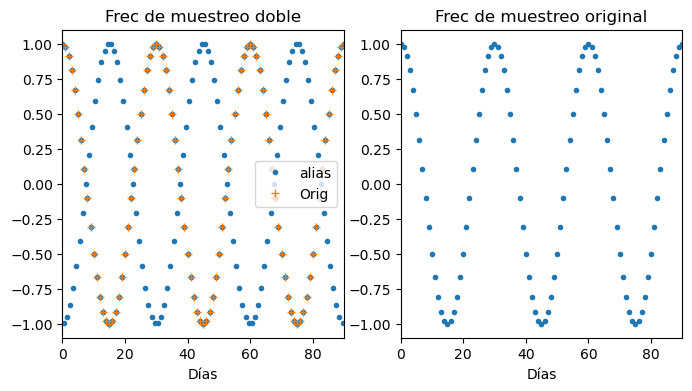

In [21]:
j = 3

fig, ax = plt.subplots(1,2, figsize=(8,4))
t_2 = np.arange(0, 2*N).astype(np.float32) / 2
ax[0].plot(t_2, np.cos(2 * np.pi * t_2 *(1/30 + j/1)), '.', label='alias')
ax[0].plot(t, np.cos(2 * np.pi * t / 30), '+', label='Orig')
#ax[0].set_xticks(np.arange(0, N, 365), np.arange(years)) 
ax[0].set_xlabel('Días')
ax[0].set_xlim((0,90))
ax[0].set_title('Frec de muestreo doble')
ax[0].legend(loc='best')

ax[1].plot(t, np.cos(2 * np.pi * t * (1/30  + j/1)), '.')
ax[1].set_xlabel('Días')
ax[1].set_xlim((0,90))
ax[1].set_title('Frec de muestreo original')

Mientras mantenga la frecuencia de muestreo $1/\Delta t$, no se reconoce que la señal tuvo otros cambios de fase, si y solo si, la nueva frecuencia es $f \pm j /\Delta t$ con $j$ entero. 

**Nota**: las frecuencias negativas representan una rotación como las agujas del reloj pero no tienen mayor impacto

$$\cos(\alpha) = \cos(-\alpha), \,\,\,\,\,\,\,\,  \sin(\alpha) = -\sin(-\alpha)$$

Es decir, las señales $\cos(\omega t)$ y  $\cos(-\omega t)$ tendrán la misma representación en serie y por tanto las frecuencias negativas se reflejan en el semieje positivo. 

En general, se trabaja con la representación exponencial. Las frecuencias son $2 \pi k t/ n$ cuando $k=0, 1, \ldots, N/2 -1$. Es fácil ver que las frecuencias con $k=N/2, N/2 + 1, \ldots, N-1$ se reflejan en el semieje negativo 

$$\exp^{i 2 \pi k t/ N} = 1 \times \exp^{i 2 \pi k t/ N} = \exp^{i 2 \pi t}  \times \exp^{i 2 \pi k t/ N} = \exp^{-i 2 \pi N t / N}  \times \exp^{i 2 \pi k t/ N} = \exp^{i 2 \pi (k-N) t/ N}$$   

## Representación gráfica


Representamos, simultáneamente, ejemplos de series de tiempo basadas en funciones armónicas y sus transformadas de Fourier para distintas frecuencias y fases.

In [22]:
from ipywidgets import interactive

# Define the function to update the plot
def update_plot(period, phase):

    # Señal
    x_t = np.cos(2 * np.pi * np.float32(t) / period + phase)
    
    fig, ax = plt.subplots(1,3, figsize=(12,4))

    # Time domain
    ax[0].plot(t, x_t,  label='Señal')
    ax[0].set_xticks(np.arange(0, N, 365), np.arange(years)) 
    ax[0].set_xlabel('Años')
    ax[0].set_ylabel('Amplitud')
    ax[0].set_title('Dominio del tiempo')
    ax[0].legend(loc='upper right')

    # Mostarmos los parámetros que definen la función trigonométrica
    ax[0].text(t.min(), x_t.min(), f'Período: {period:} Fase: {phase:.2f}', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    # Frequency domain
    x_f = np.fft.rfft(x_t)

    ax[1].set_xscale('log')
    ax[1].step(freqs_yearly, np.real(x_f), label='real')
    ax[1].step(freqs_yearly, np.imag(x_f), label='imag')
    ax[1].set_xlabel('Ciclos por año')
    ax[1].set_title('Dominio de la frecuencia')
    ax[1].legend(loc='upper right')

    # Power spectrum
    ax[2].set_xscale('log')
    ax[2].stem(freqs_yearly, np.real(x_f)**2 + np.imag(x_f)**2, 'b', markerfmt='o', basefmt='b', label='Power')
    ax[2].set_xlabel('Ciclos por año')
    ax[2].set_title('Periodograma')
    ax[2].legend(loc='upper right')
    
    fig.tight_layout() 
    # plt.legend()
    # plt.grid(True)
    plt.show()

# Create interactive widgets
interactive_plot = interactive(update_plot, period=(73, 3650, 73), phase=(0, 2 * np.pi, np.pi/6))
interactive_plot


interactive(children=(IntSlider(value=1825, description='period', max=3650, min=73, step=73), FloatSlider(valu…

**Preguntas**

¿Por qué cuando la fase es 0, $\pi$ o $2\pi$ la componente imaginaria es nula? ¿Qué terminos incluye el desarrollo en serie?

## Leakage

En general, se espera que la transformada de Fourier de una función armónica muestre un único pico para el valor de frecuencia del argumento de la función. Si, en cambio, esa frecuencia no es múltiplo de la frecuencia fundamental (1/N), se observarán valores no nulos en su entorno. Esto recibe el nombre de *leakage* y se mitiga parcialmente introduciendo una ventana móvil que promedia los valores. La ventana móvil puede agregar cierto sesgo por actuar como filtro pasa bajos...

In [23]:
from scipy.ndimage import shift
# Define the function to update the plot
def leakage_plot(freq, nyears, mw):

    # Señal
    N=365*nyears
    t = np.arange(0, N)
    x_t = np.cos(2 * np.pi * freq * t)    # freq = 1 / Período
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))

    # Time domain
    ax[0].plot(t, x_t,  label='Señal')
    ax[0].set_xticks(np.arange(0, N, 365), np.arange(nyears)) 
    ax[0].set_xlabel('Años')
    ax[0].set_ylabel('Amplitud')
    ax[0].legend(loc='upper right')

    # Mostarmos los parámetros que definen la función trigonométrica
    ax[0].text(t.min(), x_t.min(), f'Período: {1/freq:.1f} Frec: {freq:.4f} N:{N}', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    # Frequency domain
    # La freq max esta dada por la freq de Nyquist
    freq_max = 0.5 * 1 / 1
    # Como \Delta t es 1 día freq_max = 0.5 / día
    freq_fundamental = 1 / np.float32(N)
    freqs = np.arange(0, freq_max + freq_fundamental, freq_fundamental)
    # Cambio de unidades 1 / día  a 1 / año debo multiplicar por 365
    freqs_yearly = freqs * 365
    x_f = np.fft.rfft(x_t)

    if len(x_f) < len(freqs_yearly):
        freqs_yearly = freqs_yearly[0:len(x_f)]

    # simple moving window
    ps = np.real(x_f)**2 + np.imag(x_f)**2
    if mw:
        acc = np.zeros_like(ps)
        for i in range(2*mw+1):
            acc = np.roll(ps, i) + acc 
            # acc = shift(ps, i, cval=np.nan) + acc # similar a .roll() salvo por los extremos
        acc = acc / (2*mw+1)
        ps = acc[mw::(2*mw+1)]
        freqs_yearly = freqs_yearly[mw::(2*mw+1)]

    # Power spectrum
    ax[1].set_xscale('log')
    ax[1].stem(freqs_yearly, ps, 'b', markerfmt='o', basefmt='b', label='Power')
    ax[1].set_xlabel('Ciclos por año')
    ax[1].legend(loc='upper right')
    
    fig.tight_layout() 
    # plt.legend()
    # plt.grid(True)
    plt.show()

# Create interactive widgets
interactive_plot = interactive(leakage_plot, freq=(0.004, 0.008, 0.00044), nyears=(5, 15, 1), mw=(0,3,1))
interactive_plot


interactive(children=(FloatSlider(value=0.00576, description='freq', max=0.008, min=0.004, step=0.00044), IntS…

* Las frecuencias armónicas son arbitrarias y dependen de la longitud de la serie.
* Una serie más larga agrega armónicos, no suaviza la gráfica en función de la frecuencia. 
* El gráfico de potencia en función de las frecuencias armónicas se conoce como periodograma.
* El suavizado (smoothing) con, por ejemplo, una ventana móvil (moving average) da lugar al espectro (power spectrum).

Además,

* Se suele restar la media (mean adjusted) para que se cumpla $a_0=0$.
* Usando la identidad de Parseval, se suelen ajustar las amplitudes de manera que el área encerrada por el espectro de potencias se $\sigma^2$ o $\sigma^2 / 2$.

La propia definición de la serie trigonométrica nos lleva a ver que es posible extenderala para todo tiempo. El resultado es un patrón que se repite con período N. Ciertamente, todo proceso periódico puede representarse en series de Fourier. Particularmente, para suavizar el posible salto entre el fin de un período y el comienzo de otro se suelen atenuar los valores originales cerca de los extremos con la tecnica conocida como *tapping*.

Finalmente, los *wavelets* se introducen en el análisis de procesos que no tienen un período definido.

## Ejemplo de ruido blanco (white noise)

Consideramos una serie $x_t$ donde sus valores para cada $t$ provienen de una distribución gaussiana con media $\mu = 0$ y varianza $\sigma^2 = 1$. Por definición, la correlación es

$$\gamma(h) = \left\{ \begin{array}{ll} 
\sigma^2, & h=0\\
0, & h \neq 0\\
\end{array} \right.$$

In [24]:
NT = 4085
mu = 0
sigma = 1

tt = np.arange(0,NT)
noise_t = np.random.randn(NT)

var_noise = np.var(noise_t)

print(f'Varianza: {var_noise:.2f}')
print(f'Varianza por definición: {np.sum(noise_t**2)/NT:.2f}')

Varianza: 0.99
Varianza por definición: 0.99


In [25]:
noise_f = np.fft.rfft(noise_t)
narmonics = len(noise_f)
armonics = np.arange(0, narmonics)
print(f'Cantidad de armónicos: {narmonics}')

Cantidad de armónicos: 2043


Vamos a pasar la suma discreta a la integral sobre el espectro. La suma del cuadrado de las amplitudes es

$$\sum_{k=0}^{N/2} A_k^2 = \sum_{k=0}^{N/2} N A_k^2 \frac{1}{N}$$

Definimos $f = \frac{k}{N}$, entonces $\Delta f = \frac{1}{N}$. El valor medio del cuadrado de las amplitudes centrado en $f=k/N$ es

$$\bar{A}^2(f) = \bar{A}^2(\frac{k}{N}) = \frac{1}{2W+1} \sum_{v=-W}^{v=W} N A^2_{k+v}$$

Entonces, con $0 \leq f = k/N \leq 0.5$ la representación continua de la suma será con 

$$\sum_f \bar{A}^2(f) \Delta f \rightarrow \int_{0}^{0.5} A^2(f) df$$

Identidad de Parseval: 0.99
Suma de potencias: 0.99


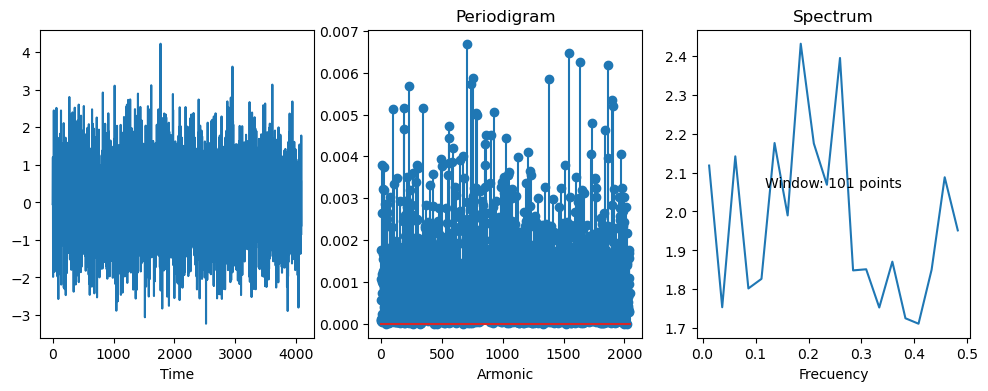

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].plot(tt, noise_t)
ax[0].set_xlabel('Time')

# Ajustamos la varianza
# Vemos que para que se cumpla la identidad de Parseval
# los a_k y b_k deben dividirse por \sqrt{2} \times N/2
noise_f_adj = noise_f * 2 / NT
# Es por como numpy define los coeficientes a_k y b_k
sqamp = np.real(noise_f_adj)**2 + np.imag(noise_f_adj)**2

print(f'Identidad de Parseval: {0.5*np.sum(sqamp):.2f}')

ax[1].stem(armonics, sqamp)
ax[1].set_xlabel('Armonic')
ax[1].set_title('Periodigram')


# moving window
# Otra opción que usaremos es np.convolve
mw = 50
#Cálculo ventana móvil vectorial 
ix = np.arange(0,len(sqamp), 2*mw+1)
ps = 0.5*np.add.reduceat(NT*sqamp, ix) / (2*mw+1)
# Recortar a un número entero de ventanas
nwindows = len(sqamp) // (2*mw+1)
ps = ps[0:nwindows]
fs = armonics[ix[0:nwindows] + mw]/NT


ax[2].plot(fs, ps)
ax[2].set_xlabel('Frecuency')
ax[2].set_title('Spectrum')
ax[2].text(0.5, 0.5, f'Window: {2*mw+1} points', horizontalalignment='center',
           verticalalignment='center', transform=ax[2].transAxes)

deltaf = 0.5/len(fs)
print(f'Suma de potencias: {np.sum(ps)*deltaf:.2f}')

Vemos que en el gráfico de espectro de potencias, el cuadrado de las amplitudes varían un 20%. En cambio, en el periodograma los cambios son mucho mayores entre armónicos sucesivos. Además, intuitivamente, se observa que el producto de la media del espectro de potencias por el rango de frecuencias (0.5) es aproximadamente 1. Es decir, iguala al $\sigma^2$ como se espera de la identidad de Parseval. Asimismo, más arriba probamos, que la suma de potencias ya nos reproducía el valor de $\sigma^2$.

## Transformada y anti-transformada de Fourier

Retomamos el ejemplo con la señal de período 1 año. Primero notamos que, como la serie $x_t$ es real, el vector con las amplitudes asociadas acada frecuencia tiene longitud $N/2$. 

In [27]:
print(f'Cantidad de frecuencias calucladas {len(x_f)}')
print(f'La amplitud asociada a la Frecuencia de Nyquist es {x_f[-1]}')

Cantidad de frecuencias calucladas 1826
La amplitud asociada a la Frecuencia de Nyquist es (-5.5289106626332796e-14+0j)


La serie cuenta con `N=3650` datos, el periodo natural es `3650` y la frecuencia de Fourier más baja `f=1/N=2.74e-4`. Si bien contamos con la mitad de frecuencias, recordamos que por cada frecuencia recuperamos la parte real (coseno) y la imaginaria (seno). 

Recuperamos la serie original aplicando la anti-transformada

Text(0.5, 0, 'Años')

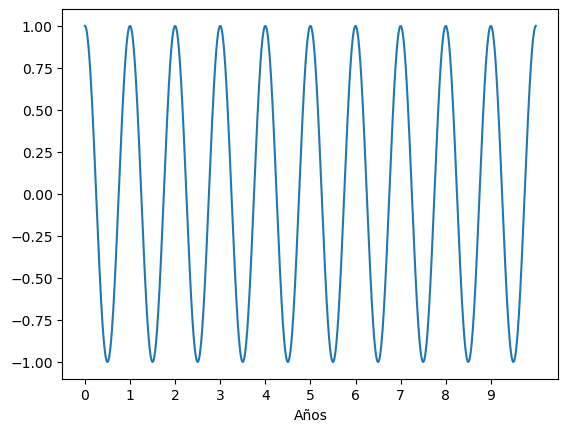

In [28]:
x_t_fft = np.fft.irfft(x_f)
plt.plot(t, x_t_fft)
plt.xticks(np.arange(0, N, 365), np.arange(years)) 
plt.xlabel('Años')

Confirmamos que la diferencia entre la serie original y la recuperada es mínima

In [29]:
print(np.sqrt(np.sum((x_t_fft - x_t)**2)))


1.322651657063678e-14


## Análisis en función de la frecuencia

Ahora, podemos usar la herramienta para conocer la composición de una serie (suma señales de frecuencia diferente y, posiblemente, ruido)

Text(0.5, 0, 'Años')

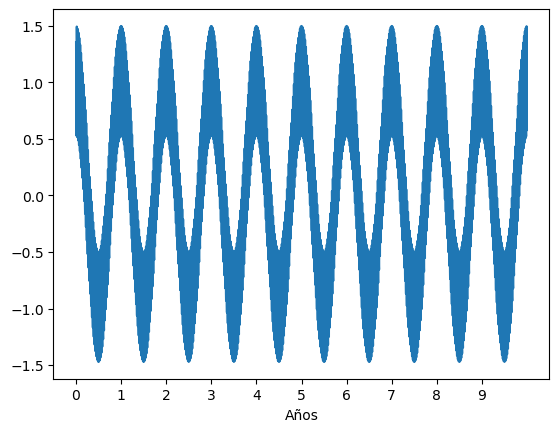

In [30]:
mu = 0
sigma = 0.2
y_amp = 1.0
w_amp = 0.5
phi_m = 2 * np.pi * 0.125
x_t = y_amp * np.cos(2 * np.pi * t / 365) + w_amp * np.cos(2 * np.pi * t / 7.0 + phi_m) 
# X_t = x_t + sigma * np.random.randn(len(t)) + mu
plt.plot(t, x_t)
plt.xticks(np.arange(0, N, 365), np.arange(years)) 
plt.xlabel('Años')

Length x_f: 1826


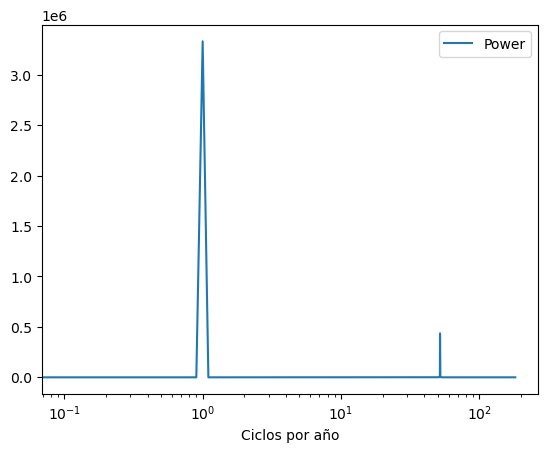

In [31]:
x_f = np.fft.rfft(x_t)
print(f'Length x_f: {len(x_f)}')

plt.xscale('log')
plt.plot(freqs_yearly, np.real(x_f)**2 + np.imag(x_f)**2, label='Power')
plt.xlabel('Ciclos por año')
plt.legend(loc='upper right')

Ciertamente, si anulamos las componentes de alta frecuencia recuperamos la señal anual

Text(0.5, 0, 'Años')

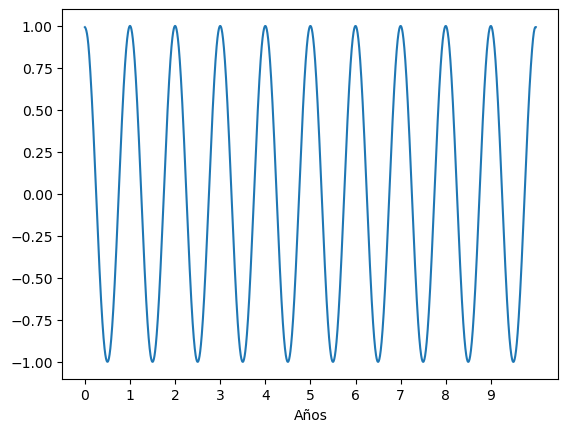

In [32]:
x_f[100:] = 0
x_t_fft = np.fft.irfft(x_f)
plt.plot(t, x_t_fft)
plt.xticks(np.arange(0, N, 365), np.arange(years)) 
plt.xlabel('Años')

## Ejercicios


1. Realizar un análisis en el dominio de las frecuencias para la demanda eléctrica diaria (`DEMANDA TOTAL`) con los datos de CAMMESA. Representar el periodograma y el espectro de frecuencias. Evaluar la varianza y verificar la identidad de Parseval. ¿Cuáles son las frecuencias más importantes (o pensar su equivalencia en duración del período)? Interpretar los resultados.  
    a. Realizar un primer análisis restando la media (mean centered).  
    b. Realizar un segundo análisis removiendo la tendencia con un modelo lineal en el tiempo. Transformar las fechas en días desde el inicio de la serie para usar como único atributo. ¿Cuál es el efecto de remover la tendencia sobre las frecuencia más bajas?  
2. Realizar un análisis en el dominio de las frecuencias para la temperatura media diaria (`TEMPERATURA REFERENCIA MEDIA GBA °C`) con los datos de CAMMESA. Representar el periodograma y el espectro de frecuencias. Evaluar la varianza y verificar la identidad de Parseval. ¿Cuáles son las frecuencias más importantes? ¿Coinciden con las frecuencias halladas para la demanda eléctrica? Considerar en remover la media o la tendencia.  
3. Realizar un análisis en el dominio de las frecuencias para la temperatura máxima (`tempmax`) de la estación meteorológica Castelar. Particionar los datos en entrenamiento (desde 1970 a 1999, media climática de 30 años) y prueba (desde 2000 a 2009). Tomando $t$ en días desde el inicio de la serie, ajustar el modelo  
$$\mathrm{tempmax} = \beta_0 + \beta_1 t + \beta_2 \cos\left(\frac{2 \pi}{365.2425}t\right) + \beta_3 \sin\left(\frac{2 \pi}{365.2425}t\right)$$
El modelo incorpora el ciclo anual de temperaturas transformando el atributo tiempo (fecha) con ayuda de las funciones trigonométricas.  
    a. ¿En qué fecha se obtienen los máximos de temperatura? ¿Coincide la fecha con el día más largo del año?  
    b. ¿Es $\beta_1$ significativo? ¿Cómo se interpreta?  
    c. Evaluar el desempeño del modelo.  
    d. Obtener la transformada discreta de Fourier para los datos de entrenamiento. Forzar a cero todas las amplitudes de los armónicos de frecuencia mayor a 1 ciclo por año. Realizar la transformación inversa y comparar con el modelo ajustado previamente.
    e. Usar los modelos para informar las temperaturas máximas medias correspondientes a cada mes del año.
   
   



In [33]:
import pandas as pd
# Dataset loading
dataFrame = pd.read_excel('Data/Base Demanda Diaria 2017 2025.xlsx', sheet_name='Datos Región', skiprows=4)  
dataFrame.set_index(pd.to_datetime(dataFrame['Fecha']), inplace=True)


In [34]:
# Recordamos que debemos quitar la media
#mean_dt = np.mean(dataFrame['DEMANDA TOTAL'])
#rescaled_dt = dataFrame['DEMANDA TOTAL'] - mean_dt
NT = len(dataFrame['DEMANDA TOTAL'])

In [35]:
from scipy import stats
# Extraemos los días que pasaron desde el inicio de la serie para cada lectura. Luego, removemos la tendencia
interval = np.float32((dataFrame.index - dataFrame.index[0]).days.values)
res = stats.linregress(interval, dataFrame['DEMANDA TOTAL'])
print(f'Intercept: {res.intercept:.0f}MW')

# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
import scipy.stats as sstats
tinv = lambda p, df: abs(sstats.t.ppf(p/2, df))
ts = tinv(0.05, len(interval)-2)
print(f"slope (95%): ({res.slope:.3f} +/- {ts*res.stderr:.4f})MW/día")

rescaled_dt = dataFrame['DEMANDA TOTAL'] - (res.intercept + res.slope * interval)

Intercept: 14757MW
slope (95%): (0.398 +/- 0.0760)MW/día


Vemos que la pendiente es significativa con un crecimiento aproximado de la demanda de 150MW por año.

Cantidad de armónicos: 1629
Varianza de la señal: 4.32e+06
Identidad de Parseval: 4.32e+06
Suma de potencias: 4.30e+06


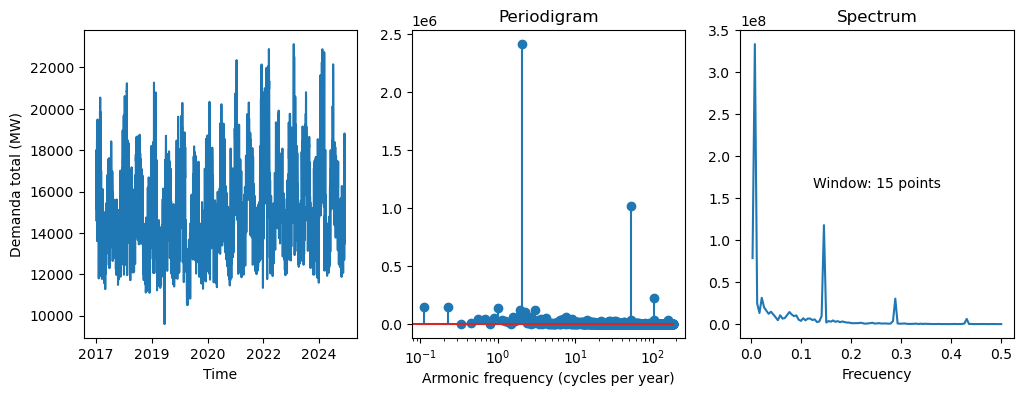

In [36]:
# DFT de la señal
dt_f = np.fft.rfft(rescaled_dt)
narmonics = len(dt_f)
armonics = np.arange(0, narmonics)
print(f'Cantidad de armónicos: {narmonics}')

fig, ax = plt.subplots(1, 3, figsize=(12,4))

# Time Domain
ax[0].plot(dataFrame['Fecha'], dataFrame['DEMANDA TOTAL'])
ax[0].set_xticks(dataFrame['Fecha'][::2*365], 
                 labels=dataFrame['Fecha'][::2*365].dt.strftime('%Y').to_list())
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Demanda total (MW)')

# Ajustamos la varianza
dt_f_adj = dt_f * 2 / NT
# Es por como numpy define los coeficientes a_k y b_k
sqamp = np.real(dt_f_adj)**2 + np.imag(dt_f_adj)**2

print(f'Varianza de la señal: {np.var(rescaled_dt):.2e}')
print(f'Identidad de Parseval: {0.5*np.sum(sqamp):.2e}')

# Cambio unidades de frec
# de 1 / día a 1 / año multiplico por 365
ax[1].stem(armonics*365/NT, sqamp)
ax[1].set_xscale('log')
ax[1].set_xlabel('Armonic frequency (cycles per year)')
ax[1].set_title('Periodigram')


#Cálculo ventana móvil vectorial 
mw=7
weights = np.ones(2*mw+1)
ps = 0.5*np.convolve(NT*sqamp, weights, mode='same') / (2*mw+1)
ps = ps[mw::2*mw+1]
fs = armonics[mw::2*mw+1]/NT


ax[2].plot(fs, ps)
ax[2].set_xlabel('Frecuency')
ax[2].set_title('Spectrum')
ax[2].text(0.5, 0.5, f'Window: {2*mw+1} points', horizontalalignment='center',
           verticalalignment='center', transform=ax[2].transAxes)

deltaf = 0.5/len(fs)
print(f'Suma de potencias: {np.sum(ps)*deltaf:.2e}')